<a href="https://colab.research.google.com/github/PHYS-2030-Computational-Methods/assignment-1-intro-to-sampling-Naveeda28/blob/main/Assignment_9_More_ODEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naveeda Ali
<br>
Due date: Mar. 19, 2024, 11:59pm
<br>
PHYS 2030 W24


# <center><font color=#46769B>Homework assignment 9</font></center>

__Rubric (100 points total)__:

- Problem 1a - __40 points__

- Problem 2a - __30 points__

- Problem 2b - __30 points__

</font>

## <font color=#46769B>Introduction: More ODEs</font>

Our goals for this notebook are:

- Gain further experience with Runge-Kutta and leapfrog methods.

Required reading:
- *Lesson 8: Higher-order methods*

- *Lesson 9: Leapfrog method*

## <font color=#46769B>Problem 1: N-body simulations</font>

### <font color=#46769B>Introduction</font>

Consider a general gravitational $N$-body problem using the leapfrog algorithm described in the lecture notes. That is, we have $n$ masses, each with their own position and velocity vectors:

$$\mathbf{r}_i(t) = (x_i(t), y_i(t), z_i(t) ) \, , \quad \mathbf{v}_a(t) = (v_{xi}(t), v_{yi}(t), v_{zi}(t) ) \, ,$$

where $i = 1, 2, ..., n$ labels the mass. (We use $n$ to indicate the number of masses, so you don't get confused with $N$ the number of timesteps.) Each mass exerts a gravitational force on all of the other masses, so the acceleration on mass $i$ is

$$\mathbf{a}_i  = \sum_{j=1\\i\ne j}^n \frac{G m_j \mathbf{r}_{ji}}{|\mathbf{r}_{ji}|^3}  \, .$$

In the previous exercises, you (probably) coded up your acceleration function using a "brute force" approach in which each term was coded up separately. This is not feasible once $n$ becomes large, so will we use a different approach here.

Before we outline the method, we will modify Newton's law of gravitation as follows:

$$\mathbf{a}_i  = \sum_{j=1}^n \frac{G m_j \mathbf{r}_{ji}}{(|\mathbf{r}_{ji}|^2 + \epsilon^2 )^{3/2}}  \, . \qquad (1)$$

The parameter $\epsilon$ is known as the __softening length__ and is introduced for practical purposes. The idea is that for fixed $h$, close flyby encounters between two masses can have a large error in their dynamics. Gravitational softening is a way of mitigating this effect. (The curious reader can learn more [here](https://astronomy.stackexchange.com/questions/50106/what-is-gravitational-softening-length)). Newtonian gravity is reproduced in the limit $\epsilon \to 0$, but a very small step $h$ is needed to reach this limit.

Here, we will use Eq. (1) for our acceleration and set $\epsilon = 0.5$. Note that we don't need to restrict the sum with $i \ne j$ anymore since the $i=j$ term vanishes since $\mathbf{r}_{ii} = \mathbf{r}_i - \mathbf{r}_i = 0$ in the numerator.

Next, it is helpful to organize the positions and velocities in a different way that we did previously. Instead of defining long vector $\mathbf{r}$ and $\mathbf{v}$, each of length $3n$, we will define these quantities as *matrices* of size $n \times 3$:

$$\mathbf{r}(t) = \left(\begin{array}{ccc} x_1(t) &  y_1(t) &  z_1(t) \\ x_2(t) &  y_2(t) &  z_2(t) \\ & \vdots & \\
x_n(t) &  y_n(t) &  z_n(t) \end{array} \right) \, , \qquad
\mathbf{v}(t) = \left(\begin{array}{ccc} v_{x1}(t) &  v_{y1}(t) &  v_{z1}(t) \\ v_{x2}(t) &  v_{y2}(t) &  v_{z2}(t) \\ & \vdots & \\
v_{xn}(t) &  v_{yn}(t) &  v_{zn}(t) \end{array} \right) \, .$$

When we initialize our arrays to save our numerical solutions, we need to initialize them with a different dimension:

```py
r = np.zeros((num_steps+1,n,3))
v = np.zeros((num_steps+1,n,3))
```

Now, our `r` carries *three* indices, e.g., `r[i,j,k]` takes the `i`th timestep, `j`th mass $m_j$, and the `k`th component of $(x,y,z)$.

Next, consider how to code up the acceleration function. Your code will look like this:

```py
def accel(t,r):

    a = np.zeros((n,3))

    for i in range(n):
        for j in range(n):
        
            ri = r[i]
            rj = r[j]
            
            # Calculate acceleration and add appropriately to a

    return a
```

So, we have nested `for` loops that calculate the acceleration on mass `i` due to `j` for all combinations of `i` and `j`. Note that the `r` variable here is a $(n \times 3)$-dimensional array. The advantage of our structuring `r` like this is that we can easily get the `i`th mass's $\mathbf{r}_i(t)$ by simple indexing `r[i]`.

With these modifications, all the usual parts of the leapfrog algorithm as the same as before.

### <font color=#46769B>Part (a):</font>

Write a code for the dynamics of $n=10$ bodies, subject to the softened gravitational force in Eq. (1). For simplicity, set $m=1$ for all masses. Also take units such that Newton's constant $G = 1$.

Take the following initial conditions for `r0` and `v0`:

- Each is a $(n \times 3)$ matrix, where each element is randomly sampled from a normal distribution centered at $0$ and with width $\sigma_r = 1$ for `r0` and $\sigma_v = 0.5$ for `v0`.

- Calculate the mean 3D velocity of the masses at $t=0$ (the center-of-mass velocity):
$$v_{\rm CM} = \frac{1}{n} \sum_{i=1}^n \mathbf{v}_{i}(0)$$
and subtract this from `v0` to remove the center-of-mass motion from your initial condition.

With this initial condition, your task is to code up the leapfrog method for this system for $N=10^4$ time steps, spanning a time interval $[0,100]$.

Make a parametric plot of the trajectories of all particles in the $x$-$y$ plane. That is, do this
```py
plt.plot(x,y)
```
where `x` and `y` are the list of $x_i(t), y_i(t)$ values for all time steps for mass $i$. Plot all masses on the same plot, and make your figure a square shape with the same range on both $x$ and $y$ axes.


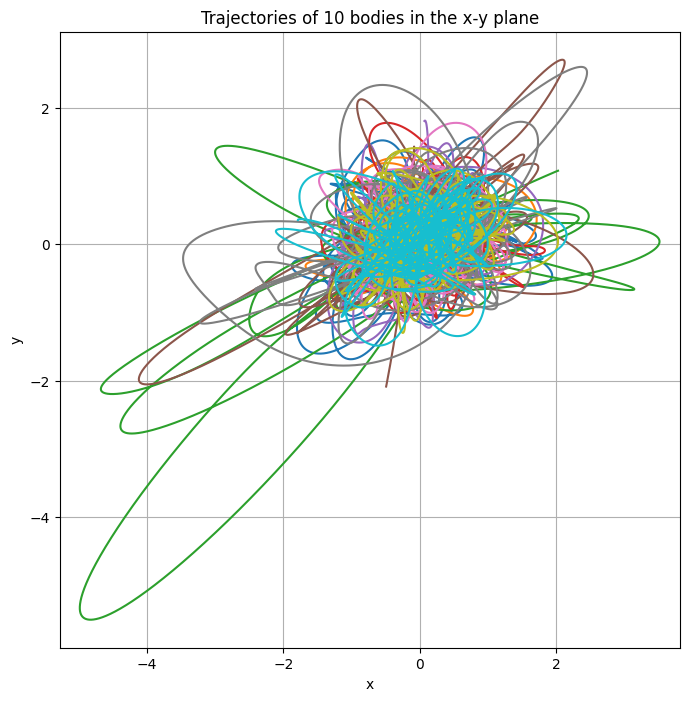

In [4]:
#Your code for Part (a) here
import numpy as np
import matplotlib.pyplot as plt

#Constants
n= 10
G= 39.42
m1 = m2 = 1.0
epsilon = 0.5 #Softening
d= 1.0
t0= 0
tf= 20
sigma_r= 1.0
sigma_v= 0.5
omega= 2 * np.pi

#Acceleration function
def accel(r):
    a = np.zeros((n, 3))
    for i in range(n):
        for j in range(n):
            if i != j:
                rij = r[j] - r[i]
                dist_sq = np.sum(rij**2) + epsilon**2
                a[i] += G*rij/dist_sq**(3/2)
    return a

#Leapfrog method
def leapfrog(num_steps):
    t = np.linspace(t0, tf, num=num_steps + 1)
    h = (tf - t0) / num_steps
    r = np.zeros((num_steps + 1, n, 3))
    v = np.zeros((num_steps + 1, n, 3))

    #Initial conditions
    r[0] = r_initial
    v[0] = v_initial

    for i in range(num_steps):
        v[i] += h/2 * accel(r[i])  #First kick
        r[i+1] = r[i] + h * v[i]   #Drift
        v[i+1] = v[i] + h/2 * accel(r[i + 1])  #Second kick

    return r, v

num_steps = 10**4
#Intial values from normal distribution
r_initial = np.random.normal(0, sigma_r, (n, 3))
v_initial = np.random.normal(0, sigma_v, (n, 3))

#Subtract the center-of-mass velocity
v_cm = np.mean(v_initial, axis=0)
v_initial = v_initial - v_cm

#Run the simulation
r, v = leapfrog(num_steps)

#Plotting the trajectories in the x-y plane
plt.figure(figsize=(8, 8))
for i in range(n):
    plt.plot(r[:,i,0], r[:,i,1])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title('Trajectories of 10 bodies in the x-y plane')
plt.grid(True)
plt.show()


### <font color=#46769B>Part (b):</font>

Next, we will use a package called `celluloid` to make an animation of your $n$-body simulation. The basic idea of `celluloid` is that you make a series of plots, take a snapshot of each one, and then each snapshot becomes a frame in an animation.

If you are running your code in Colab, you need to uncomment the second line `!pip install celluloid`.

Your task is to take your results from Part (a) and run the following code to make an animation. Feel free to modify anything here as you like, but you don't need to change anything here. This is just for your own benefit: it is nice to see an animation of your $N$-body simulation.

In [ ]:
# Uncomment this next line in Google Colab
!pip install celluloid

from celluloid import Camera
from IPython.display import HTML

fig = plt.figure(figsize=(8,8))
camera = Camera(fig)

plt.xlim([-10,10])
plt.ylim([-10,10])

t = np.linspace(t0, tf, num=num_steps + 1)
num_steps = len(t)-1

skip = 50 # Only includes every 50th time step

for i in range(10,num_steps,skip):
    for j in range(n):
        plt.plot(r[i-10:i,j,0],r[i-10:i,j,1],'.')

    camera.snap()

animation = camera.animate(interval=20)
plt.close()

HTML(animation.to_html5_video())


## <font color=#46769B>Problem 2: Chaos</font>

### <font color=#46769B>Introduction</font>

Here we consider a __driven damped pendulum__, given by the equation of motion

$$\theta''(t) + \gamma \theta'(t) + \omega^2 \sin(\theta(t)) = A \omega^2 \cos(\nu t) \, . \qquad (1)$$

The term on the right-hand side represents an external driving force that exerts a periodic torque to the pendulum arm, with (angular) frequency $\nu$ and amplitude $A$. (Note the form of the driving force here is different than for Kapitza's pendulum, for which the pivot was forced to move up and down.)

This system is one of the simplest dynamical systems that exhibits __chaotic motion__. How is chaos defined mathematically in this context? One necessarily condition is *sensitivity to initial conditions*, also known as the __butterfly effect__. Two trajectories, with very slightly different initial conditions, will diverge exponentially from one another and will have very different positions and velocities at some later time.

Suppose we have solved Eq. (1) *twice*, each for a different initial condition. For example, suppose solution 1 is labeled $\theta_1(t)$ and has initial condition

$$\theta_1(0) = \theta_0 , \quad \theta'_1(0) = 0$$

and solution 2 is labeled $\theta_2(t)$ and has initial condition

$$\theta_2(0) = \theta_0 + \epsilon , \quad \theta'_2(0) = 0$$

where $\epsilon$ is a very small number. The difference

$$\Delta \theta(t) = |\theta_1(t) - \theta_2(t)| \, \qquad (2) $$

as a function of time can be approximately parametrized as

$$\Delta \theta(t) \approx  \epsilon \, e^{\lambda t} \, . \qquad (3) $$

The exponent $\lambda$ is known as a __Lyapunov exponent__.
- $\lambda > 0$ indicates chaotic motion, where tiny differences grow exponentially in time.
- $\lambda < 0$ indicates non-chaotic damped motion, where slightly different solutions converge to a common periodic trajectory.

(This is a bit of a simplification. Since we can also quantify the divergence in the *angular velocity* difference $|\theta'_1(t) - \theta'_2(t)|$, there are in fact two Lyapunov exponents for this setup. Here we keep it simple and only consider $\lambda$ as defined above. Further reading can be found [here](https://hypertextbook.com/chaos/lyapunov-1/) and [here](https://en.wikipedia.org/wiki/Lyapunov_exponent).)

Here we will consider the following parameters

$$\omega = 1.5 , \quad \gamma = 0.75 , \quad \nu = 1$$

and we will consider several values of $A$.

There is wonderful reference [here](http://galileoandeinstein.phys.virginia.edu/7010/CM_22a_Period_Doubling_Chaos.html) that covers this system in detail. I recommend taking a look there before you begin this exercise. The parameters chosen here match those adopted in this reference, although the notation is a bit different.


### <font color=#46769B>Part (a)</font>

First, write a function `RK4_method(theta0,A)` using a `def` statement that can perform the RK4 method for the system in Eq. (1), for $t$ in the range $[0,100]$. Here the arguments are the initial condition $\theta_0 = \theta(0)$, and the amplitude $A$ for the driving term. Your code should perform a convergence test so that your solution converges within a tolerance of `atol=1e-2` and `rtol=1e-2`.

Using your code, perform the following tasks:

- Taking $\theta_0 = 0$ and $A=1.0$, solve for $\theta(t)$ and $\theta'(t)$.

- Make plot of $\theta(t)$ vs $t$. This case is *non-chaotic* motion. You will notice a few oscillations of varying height, known as *initial transients*, before your solution settles down into a regular pattern. Note by eye the time when the initial transients have gone.

- Make a phase portrait of $\theta'(t)$ vs $\theta(t)$ from your numerical solution. Make two versions of the plot (either separate or in the same figure):

    - For all values of $t$ in your numerical solution.
    
    - Only for values of $t$ *after* the initial transients have died away.

The latter plot makes clear that you have periodic motion. (But in the first plot it is nice to see how the trajectory is attracted to its periodic trajectory.)

- Plot $\log \Delta \theta(t)$ (where $\log$ is natural log) vs $t$, where $\Delta \theta(t)$ is defined in Eq. (2), taking $\epsilon = 10^{-3}$. That is, your numerical solution for $\theta(t)$ above corresponds to $\theta_1(t)$, and you will have to generate a new numerical solution $\theta_2(t)$ by solving the ODE again with an initial condition $\theta_0 = \epsilon$ (and all other parameters the same). Include axes labels in your plot.

Note in the above plot, the difference $\Delta \theta(t)$ starts decreasing *after* the transients have died away.

- Calculate (and print out) the Lyapunov exponent $\lambda$. To do this, you are fitting a straight line to your plot of $\log \Delta \theta(t)$ vs $t$, *only in the region after the transients*. Feel free to be creative here, but it may be useful to use the function `numpy.polyfit(x,y,deg)`, where the `x` values are your values for $t$, the `y` values for $\Delta \theta)$, and `deg=1` fits a polynomial of degree 1. The slope is $\lambda$.

- Plot your straight line fit with slope $\lambda$ on your plot above.

Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Not converged yet. Trying 800 steps.
Converged with 800 steps.


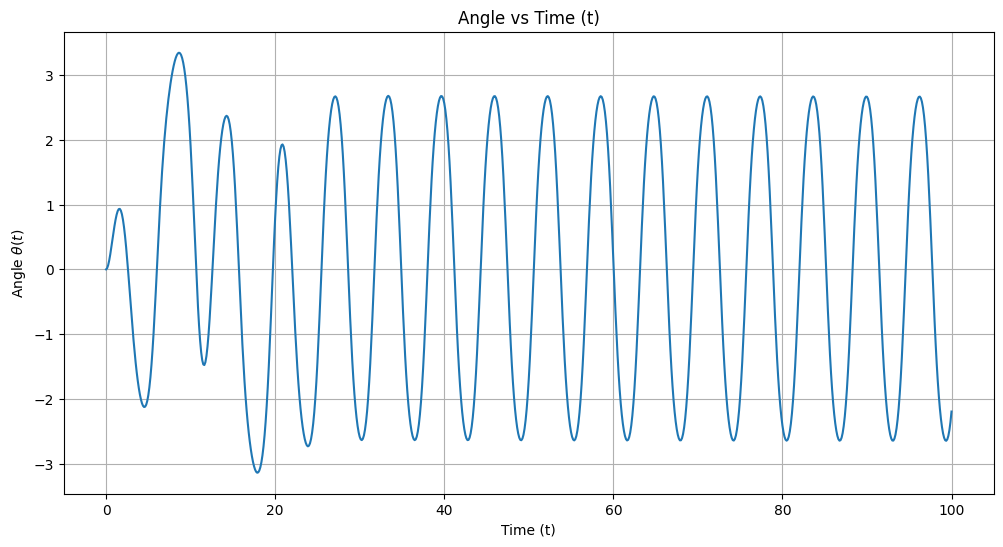

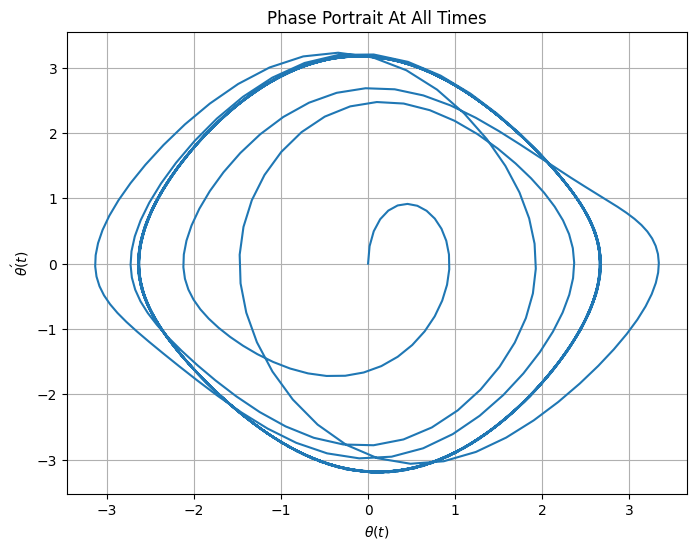

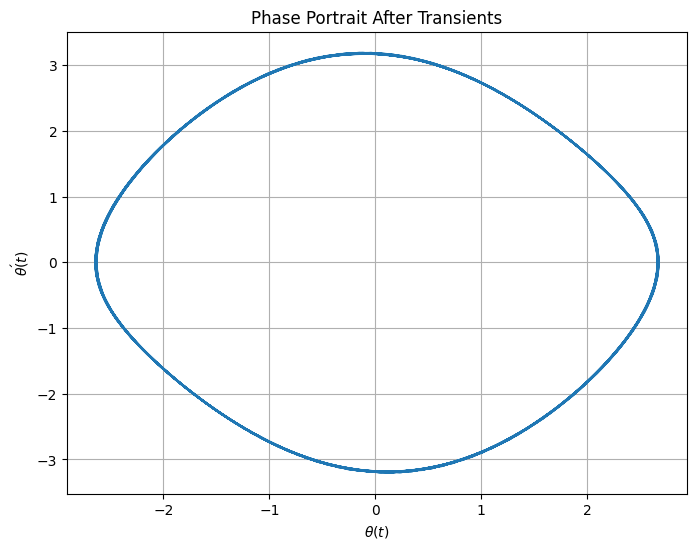

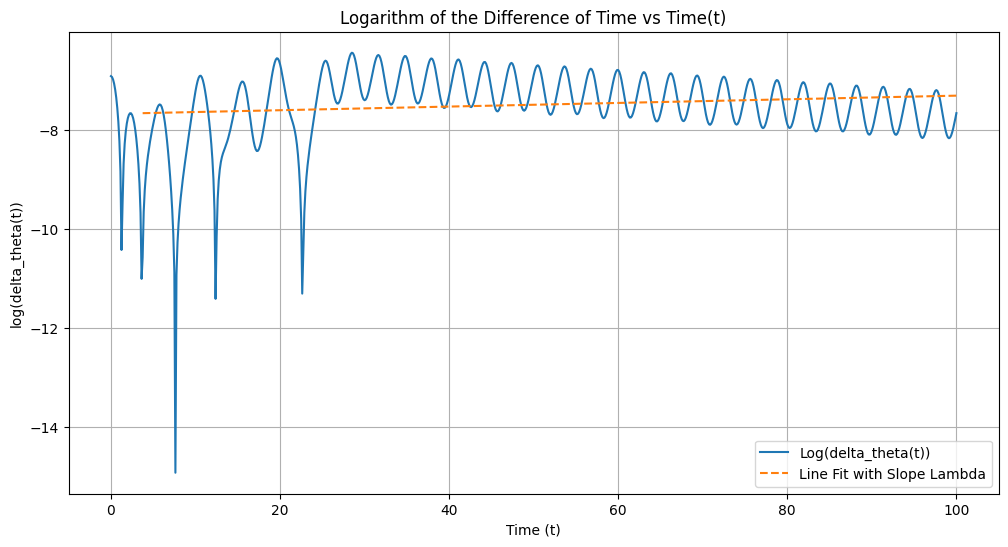

The Lyapunov exponent lambda is approximately 0.0036752494439900346


In [5]:
# Your code for Problem 2(a) here
#Define the differential equations for the driven damped pendulum
def pendulum_eq(t, y, A):
    theta, theta_dot = y
    return np.array([theta_dot, -gamma*theta_dot - omega**2*np.sin(theta) + A*omega**2 * np.cos(nu*t)])

#RK4 method
def RK4_method(theta_0,A):
    t = np.linspace(t0, tf, num_steps + 1)
    h = tf / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = pendulum_eq(ti, yi, A)
        k2 = pendulum_eq(ti+h/2, yi+h/2 * k1, A)
        k3 = pendulum_eq(ti+h/2, yi+h/2 * k2, A)
        k4 = pendulum_eq(ti+h, yi+h * k3, A)
        k = (k1+2*k2+2*k3+k4)/ 6
        y[i+1] = yi + h * k
    return t, y

# Constants for the driven damped pendulum
omega = 1.5
gamma = 0.75
nu = 1.0
A = 1.0
t0 = 0
tf = 100
theta_0 = 0
epsilon = 1e-3

#Find convergence for RK4 method
num_steps = 100
t_old, y_old = RK4_method(theta_0,A)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = RK4_method(theta_0,A)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Solve for first set of initial conditions
t, y1 = RK4_method(theta_0,A)

#Solve for second set of with initial condition episilon
t, y2 = RK4_method(epsilon,A)

#Plot theta vs time
plt.figure(figsize=(12, 6))
plt.plot(t, y1[:, 0])
plt.xlabel('Time (t)')
plt.ylabel(r'Angle $\theta(t)$')
plt.title('Angle vs Time (t)')
plt.grid(True)
plt.show()

#Phase portrait for all values of t
plt.figure(figsize=(8, 6))
plt.plot(y1[:, 0], y1[:, 1])
plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\theta\'(t)$')
plt.title('Phase Portrait At All Times')
plt.grid(True)
plt.show()


#Create the phase portrait using data after the transients have settled.
transient_time = 30
transient_index = np.where(t >= transient_time)[0][0]
plt.figure(figsize=(8, 6))
plt.plot(y1[transient_index:, 0], y1[transient_index:, 1])

plt.title('Phase Portrait After Transients')
plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\theta\'(t)$')
plt.grid(True)
plt.show()

#Calculate delta theta (difference between first and second set)
delta_theta = np.abs(y1[:, 0] - y2[:, 0])
#Add a small number to log(delta_theta) to avoid log(0)
log_delta_theta = np.log(delta_theta + 1e-10)

#Fit a straight line with slope lambda using np.polyfit
line_fit = np.polyfit(t[transient_time:], log_delta_theta[transient_time:], 1)
lambda_lyapunov = line_fit[0]


plt.figure(figsize=(12, 6))
#Plot log delta theta vs t
plt.plot(t, log_delta_theta, label='Log(delta_theta(t))')
#Plot straight line with slope lambda
plt.plot(t[transient_time:], lambda_lyapunov*t[transient_time:] + line_fit[1], label='Line Fit with Slope Lambda', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('log(delta_theta(t))')
plt.title('Logarithm of the Difference of Time vs Time(t)')
plt.legend()
plt.grid(True)
plt.show()

print('The Lyapunov exponent lambda is approximately', lambda_lyapunov)



### <font color=#46769B>Part (b)</font>

Now repeat the tasks from Part (a) with a new value of $A = 1.18$, which yields *chaotic* motion. A few notes:

- Since it is not clear here what are initial transients, you need not remove them.

- Your phase portrait will not exhibit periodic motion.

- For calculating the Lyapunov exponent $\lambda$, take $\epsilon=10^{-10}$. (It is helpful to choose small $\epsilon$ for $\lambda > 0$ since the differences will grow and larger $\epsilon$ for $\lambda < 0$ since differences will shrink.)

- Your convergence test should require about $N=10^5$ steps for the RK4 method.


Not converged yet. Trying 200 steps.
Not converged yet. Trying 400 steps.
Converged with 400 steps.


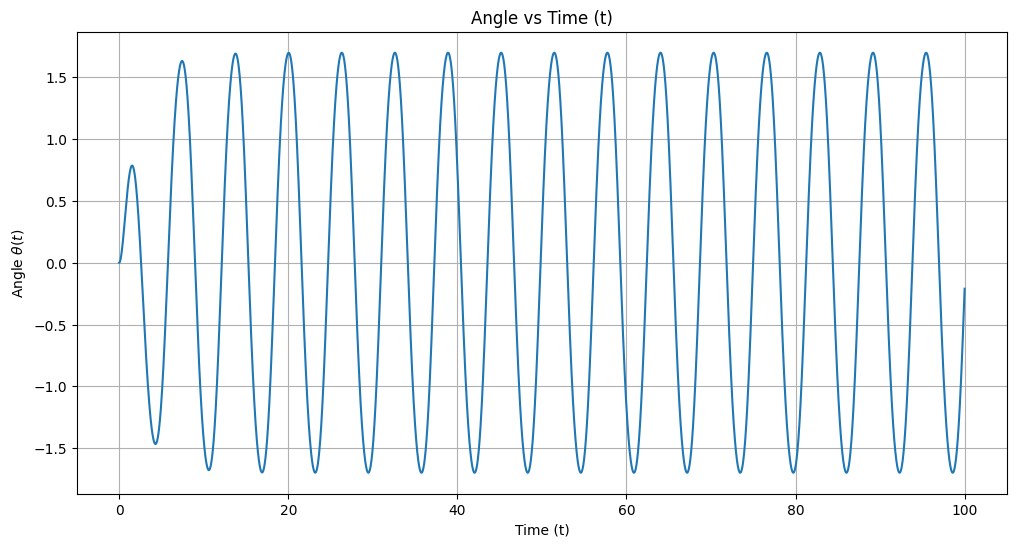

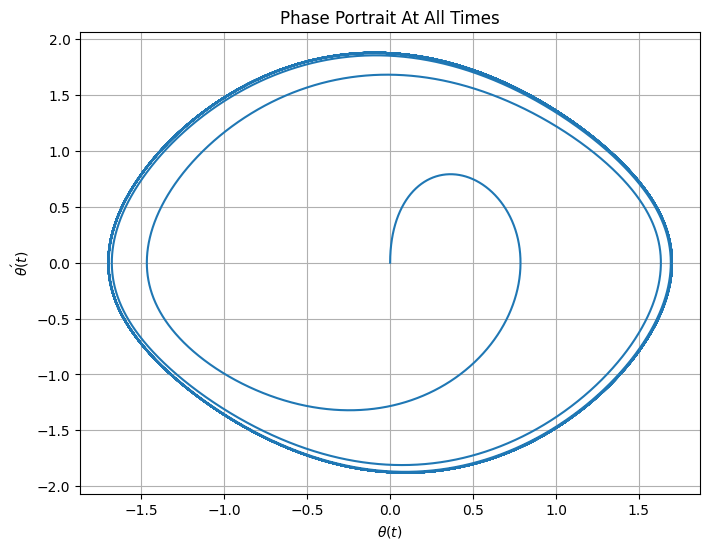

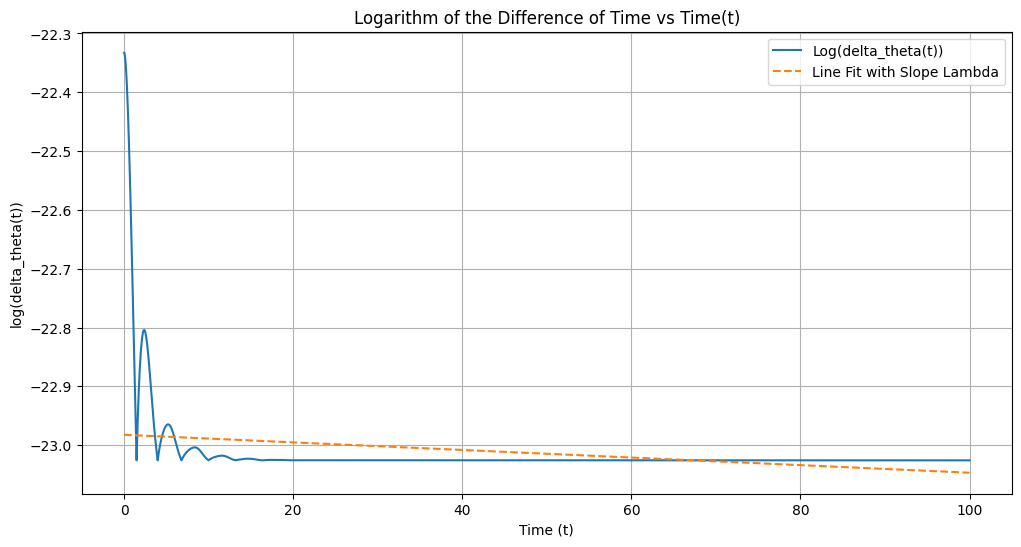

The Lyapunov exponent lambda is approximately -0.0006452793338602167


In [7]:
# Your code for Problem 2(b) here
#Define the differential equations for the driven damped pendulum
def pendulum_eq(t, y, A):
    theta, theta_dot = y
    return np.array([theta_dot, -gamma*theta_dot - omega**2*np.sin(theta) + A*omega**2 * np.cos(nu*t)])

#RK4 method
def RK4_method(theta_0,A):
    t = np.linspace(t0, tf, num_steps + 1)
    h = tf / num_steps
    y = np.zeros((num_steps + 1, 2))
    y[0] = np.array([theta_0, 0])

    for i in range(num_steps):
        ti = t[i]
        yi = y[i]
        k1 = pendulum_eq(ti, yi, A)
        k2 = pendulum_eq(ti+h/2, yi+h/2 * k1, A)
        k3 = pendulum_eq(ti+h/2, yi+h/2 * k2, A)
        k4 = pendulum_eq(ti+h, yi+h * k3, A)
        k = (k1+2*k2+2*k3+k4)/ 6
        y[i+1] = yi + h * k
    return t, y

#Constants
omega = 1.5
gamma = 1.18
nu = 1.0
A = 1.0
t0 = 0
tf = 100
theta_0 = 0
epsilon = 1e-10

#Find convergence for RK4 method
num_steps = 100
t_old, y_old = RK4_method(theta_0,A)
converged = False

#Find what number of steps convergence will occur
while not(converged):
    #Try double steps
    num_steps = 2 * num_steps
    print("Not converged yet. Trying", num_steps, "steps.")
    t_new, y_new = RK4_method(theta_0,A)
    converged = np.allclose(y_old, y_new[::2], atol=1e-2, rtol=1e-2)
    y_old = y_new
print("Converged with", num_steps, "steps.")

#Convergence test was requiring around 800 steps so I altered the steps
num_steps = 10**5

#Solve for first set of initial conditions
t, y1 = RK4_method(theta_0,A)

#Solve for second set of with initial condition episilon
t, y2 = RK4_method(epsilon,A)

#Plot theta vs time
plt.figure(figsize=(12, 6))
plt.plot(t, y1[:, 0])
plt.xlabel('Time (t)')
plt.ylabel(r'Angle $\theta(t)$')
plt.title('Angle vs Time (t)')
plt.grid(True)
plt.show()

#Phase portrait for all values of t
plt.figure(figsize=(8, 6))
plt.plot(y1[:, 0], y1[:, 1])
plt.xlabel(r'$\theta(t)$')
plt.ylabel(r'$\theta\'(t)$')
plt.title('Phase Portrait At All Times')
plt.grid(True)
plt.show()


#Calculate delta theta (difference between first and second set)
delta_theta = np.abs(y1[:, 0] - y2[:, 0])
#Add a small number to log(delta_theta) to avoid log(0)
log_delta_theta = np.log(delta_theta + 1e-10)

#Fit a straight line with slope lambda using np.polyfit
line_fit = np.polyfit(t, log_delta_theta, 1)
lambda_lyapunov = line_fit[0]


plt.figure(figsize=(12, 6))
#Plot log delta theta vs t
plt.plot(t, log_delta_theta, label='Log(delta_theta(t))')
#Plot straight line with slope lambda
plt.plot(t, lambda_lyapunov * t + line_fit[1], label='Line Fit with Slope Lambda', linestyle='--')
plt.xlabel('Time (t)')
plt.ylabel('log(delta_theta(t))')
plt.title('Logarithm of the Difference of Time vs Time(t)')
plt.legend()
plt.grid(True)
plt.show()

print('The Lyapunov exponent lambda is approximately', lambda_lyapunov)
